In [1]:
import numpy as np
import matplotlib.pyplot as plt

import concave_enclosed_csf_list
import _image_processing
import _image_curve
import _utils
import _scaling_functions

In [7]:
import importlib
importlib.reload(concave_enclosed_csf_list)

<module 'concave_enclosed_csf_list' from 'C:\\Users\\ghage\\PycharmProjects\\enclosedcurveshorteningflow\\concave_enclosed_csf_list.py'>

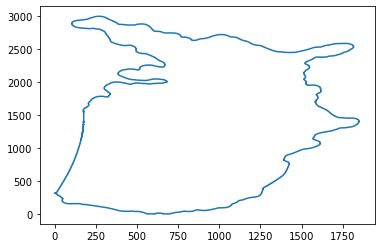

In [8]:
im = _image_processing.load_image(r"C:/Users/ghage/PycharmProjects/morphoscale/lib/polygon_test_shapes/heart.bmp")
im = _image_processing.load_image(
    r"C:/Users/ghage/PycharmProjects/enclosedcurveshorteningflow/lib/silhouettes/opened/united-states-silhouette.jpg")
im = _image_processing.smooth_image(im, 10)
curve = _image_curve.ImageCurve(im).curve()
plt.plot(*curve.transpose())

In [9]:
curve_obj = concave_enclosed_csf_list.ConcaveEnclosedCSFList(curve, 
                                                             max_iterations=1000,
                                                             refresh_interval=100, 
                                                             save_interval=10)

In [10]:
curve_obj.run()

Iteration: 0, Concavity:  1470.95, Area to original %:  100.00
Iteration: 100, Concavity:  12.90, Area to original %:  91.06
Iteration: 200, Concavity:  10.17, Area to original %:  83.80
Iteration: 300, Concavity:  12.59, Area to original %:  77.15
Iteration: 400, Concavity:  14.89, Area to original %:  70.77
Iteration: 500, Concavity:  13.47, Area to original %:  64.50
Iteration: 600, Concavity:  10.60, Area to original %:  58.27
Iteration: 700, Concavity:  9.61, Area to original %:  52.23
Iteration: 800, Concavity:  9.25, Area to original %:  46.38
Iteration: 900, Concavity:  8.99, Area to original %:  40.66


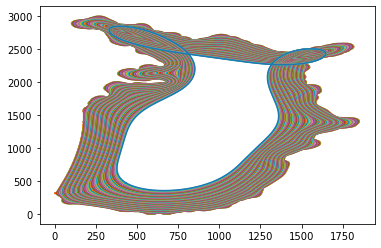

In [14]:
_ =[plt.plot(*curve.transpose()) for curve in curve_obj.curves]

In [2]:
sf = _scaling_functions.f_sigmoid(alpha=10, a=1)

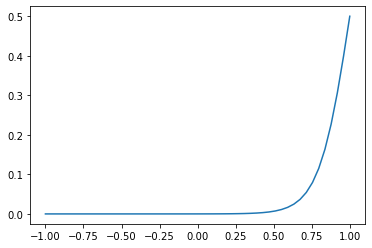

In [5]:
x = np.linspace(-1, 1)
plt.plot(x, sf(x))

In [15]:
curve_obj = concave_enclosed_csf_list.ConcaveEnclosedCSFList(curve, 
                                                             max_iterations=1000,
                                                             refresh_interval=10, 
                                                             save_interval=10, 
                                                             scaling_function=sf)

In [16]:
curve_obj.run()

Iteration: 0, Concavity:  1470.95, Area to original %:  100.00


AttributeError: 'ConcaveEnclosedCSFList' object has no attribute 'scaling_function'